In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from matplotlib.animation import FuncAnimation, PillowWriter

# Definiëren van golfpakket

Om een simulatie voor het kwantum tunneleffect te maken, moet het deeltje als een free particle worden gedefiniëerd. Dit wordt gedaan door een Gaussisch pakket te definieren als beginfunctie.

$$\Psi(x,0) \propto e^{-\left(\frac{x-x_0}{2\sigma}\right)^2}\ e^{-ikx}$$

Deze functie is echter niet genormaliseerd. Dit kan echter gedaan worden, door de golffunctie te normaliseren.

$$\int_\infty^\infty \left|\Psi(x,0)\right|^2 dx = 1$$


Dit wordt in de volgende class gedaan. Als eerst worden de variabelen gedefinieerd, om vervolgens de beginfunctie $\Psi(x,0) te creëren. Vervolgens wordt deze genormaliseerd. De class kan uiteindelijk opgeroepen worden met de zelfde syntax als een functie, en vervolgens aan een variabelen te declareren. Bijvoorbeeld:

```python

function = Wave_packet(N, x0, sigma0, x_begin, x_end)
```

In [26]:
class Wave_packet:

    def __init__(self, N, x0, sigma0, x_begin, x_end, k0=0):

        self.N = N
        self.x0 = x0
        self.sigma0 = sigma0
        self.x_begin = x_begin
        self.x_end = x_end
        self.k0 = k0

        self.x, self.dx = np.linspace(self.x_begin, self.x_end, self.N, retstep=True)

    def packet(self):
        self.psi0 = np.exp(-(self.x-self.x0)**2/(2*self.sigma0)**2) * np.exp(-1j * self.k0 * self.x)
        norm = np.sum(np.abs(self.psi0)**2*self.dx, axis=0)
        self.psi0 = self.psi0 / np.sqrt(norm)
        return self.psi0


# Definitie Potentiaal

- Code niet meegeven in de opgave.
- Misschien wel uitleg geven over hoe het potentiaal gedefinieerd kan worden.

Het potentiaal kan misschien ook iets eleganter gedefinieerd worden.


In [27]:
def potential(x, d, barriere1, barriere2, volt=1,):
     a = -volt / (d)
     k1 = (barriere1 + barriere2 + volt + a*(x-(75-d/2))) * ((x >= (75-d/2))* (x <= 75+d/2))
     k2 = (volt + barriere2) * ((x >= x[0]) * (x < (75-d/2)))

     return k1 + k2

In [28]:
packet = Wave_packet(10000, 20, 5, -150, 200, k0=-1)

x = packet.x
dx = packet.dx

V = potential(x, 5, 1, 0.5, volt=1)

(0.0, 150.0)

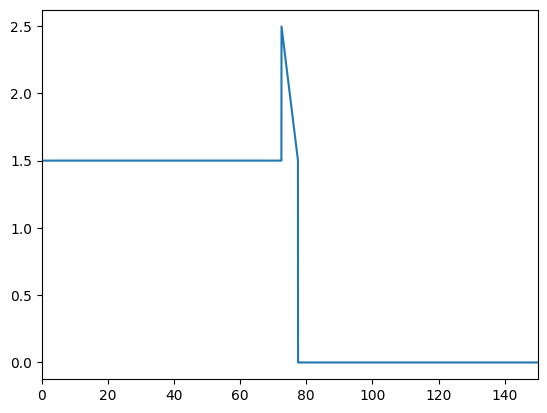

In [29]:
plt.plot(x, V)
plt.xlim([0, 150])

In [30]:
def get_e(x, dx, V):
    main = 1/dx**2 + V
    off = -1/(2*dx**2) * np.ones(len(main)-1)

    E, psi = eigh_tridiagonal(main, off)

    psi = psi.T

    norm = np.sum(np.abs(psi)**2 * dx, axis=0)
    psi = psi/np.sqrt(norm)

    return E, psi

# Berekening tijdsafhankelijke vergelijking

De tijdsafhankelijke Schrödingervergelijking kan bepaald worden door een superpositie te nemen van alle tijdsonafhankelijke golftoestanden, en deze vervolgens te vermenigvuldigen met het tijdsafhankelijke deel

$$\Psi(x,t) = \sum_{n=1}^\infty c_n\ \psi_n(x)\ e^{-\frac{i E_n t}{\hbar}}$$

met $c_n$ een waarschijnlijkheidscoëfficiënt die bepaald hoe groot de kans is dat de golffunctie $\psi_n$ voorkomt.

$$ c_n = \int_{-\infty}^\infty \psi_n(x)^* \Psi(x,0)\ dx$$

Nu kan voor $t$ een waarde worden ingevuld en dan wordt op dat tijdstip de Schrödingervergelijking uitgerekend.

In [31]:
def get_t(E, psi, psi0, t):

    cn = np.zeros_like(psi[0], dtype=complex)

    for j in range(0, len(psi)):

        cn[j] = np.sum(np.conj(psi[j]) * psi0 * dx)

    psi_t = psi.T@(cn*np.exp(-1j*E*t))
    norm = np.sum(np.abs(psi_t)**2 * dx)
    psi_t = psi_t/np.sqrt(norm)
    return psi_t

In [32]:
psi0 = packet.packet()
E, psi = get_e(x, dx, V)
t = np.linspace(0,25, 1000)
psi_t = get_t(E, psi, psi0, 120)

(0.0, 150.0)

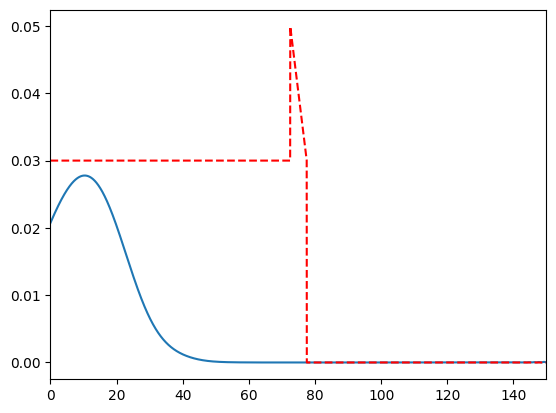

In [33]:
plt.plot(x, np.abs(psi_t)**2)
plt.plot(x, V/50, 'r--')
plt.xlim([0, 150])

# Animatie

De animatie kan worden uitgevoerd door eerst een vector $t$ te creëren, en vervolgens een animatie te maken over deze vector (netzoals bij de oneindig en eindig diepe put is gedaan). 

In [34]:
# fig = plt.figure(figsize = (10, 12))
# ax = plt.axes(xlim=(0,150), ylim=(0, 0.085))
# ax.plot(x, V/50, 'r--')

# ln, = ax.plot([],[])

# def animate(i):

#     ln.set_data(x, np.abs(get_t(E, psi, psi0, i))**2)
#     return ln,

# ani =  FuncAnimation(fig, animate, frames = 120, interval = 50, blit=False)

# ani.save('tunnel_schuin.gif', writer='pillow', fps=30, dpi=100)

# plt.show()

<img src="tunnel_schuin.gif" width="1000" height="800" />

In [43]:
d = np.linspace(0.1, 11, 100)
Ti = []
for i in d:
    V = potential(x, i, 1, 0.5, volt=1)
    psi0 = packet.packet()
    E, psi = get_e(x, dx, V)
    
    psi_l = get_t(E, psi, psi0, 120)[x <= 75]
    psi_r = get_t(E, psi, psi0, 120)[x > 75]
    psi_t = get_t(E, psi, psi0, 120)

    T = np.sum(np.abs(psi_r)**2 * dx)/(np.sum(np.abs(psi_t)**2 * dx))
    Ti.append(T)

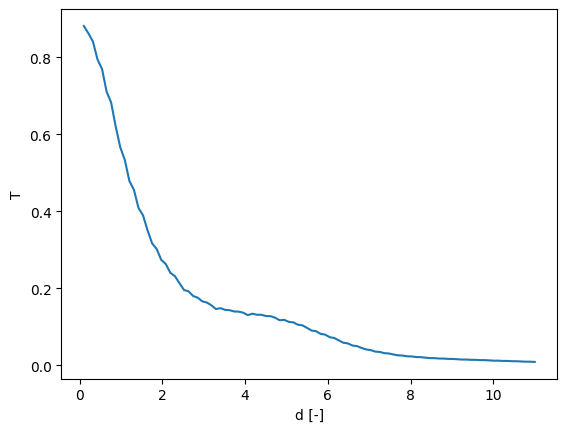

In [42]:
plt.plot(d, Ti)
plt.xlabel('d [-]')
plt.ylabel('T')

plt.show()

In [48]:
V = potential(x, 5, 1, 0.5, volt=1)
psi0 = packet.packet()
E, psi = get_e(x, dx, V)

psi_l = get_t(E, psi, psi0, 90)[x <= 75]
psi_r = get_t(E, psi, psi0, 90)[x > 75]
psi_t = get_t(E, psi, psi0, 90)

In [52]:
psi_t0 = get_t(E, psi, psi0, 0)

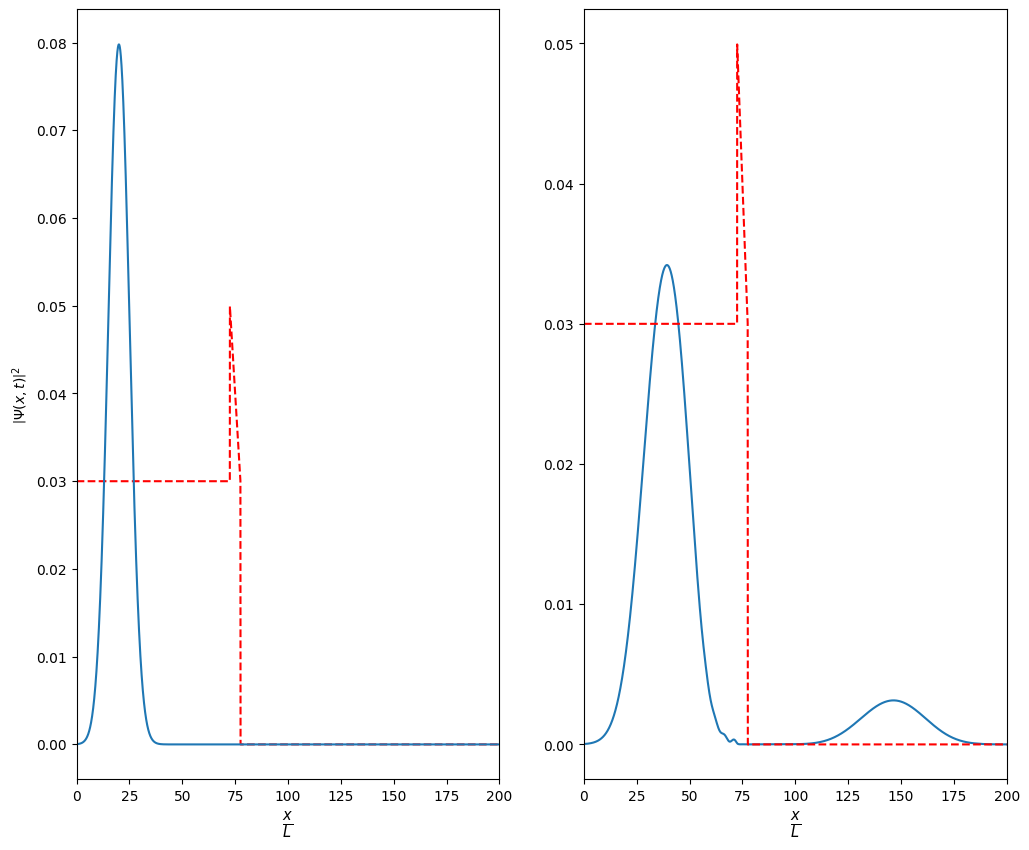

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,10))

ax1.plot(x, V/50, 'r--')
ax1.plot(x, np.abs(psi_t0)**2)
ax1.set_xlim([0,200])
ax1.set_ylabel(r"$\left|\Psi(x,t)\right|^2$")
ax1.set_xlabel(r'$\frac{x}{L}$', fontsize=15)

ax2.plot(x, np.abs(psi_t)**2)
ax2.plot(x, V/50, 'r--')
ax2.set_xlim([0,200])
ax2.set_xlabel(r'$\frac{x}{L}$', fontsize=15)
plt.show()